# 1. Carga de datos

In [85]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [86]:
# Abrir archivo de datos
df = pd.read_csv('/datasets/games.csv')

# 2. Preprocesamiento de datos

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [88]:
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6697,Avatar: The Last Airbender - The Burning Earth,Wii,2007.0,Action,0.23,0.00,0.00,0.02,NaN,NaN,NaN
304,Assassin's Creed: Unity,PS4,2014.0,Action,1.19,2.07,0.08,0.62,70.0,4.9,M
5830,Touhoku Daigaku Mirai Kagaku Gijutsu Kyoudou K...,PSP,2005.0,Misc,0.00,0.00,0.30,0.00,NaN,NaN,NaN
12720,The Amazing Spider-Man 2 (2014),WiiU,2014.0,Action,0.03,0.02,0.00,0.00,NaN,NaN,NaN
13797,Zen-Nippon GT Senshuken,SNES,1995.0,Racing,0.00,0.00,0.04,0.00,NaN,NaN,NaN
12579,A New Beginning,PC,2010.0,Adventure,0.00,0.05,0.00,0.01,NaN,NaN,NaN
9729,Star Trek: Conquest,Wii,2007.0,Strategy,0.11,0.01,0.00,0.01,49.0,4.9,E
5341,Tiger Woods PGA Tour 12: The Masters,Wii,2011.0,Sports,0.20,0.11,0.00,0.03,85.0,6.7,E
6252,Guitar Hero: Van Halen,PS3,2009.0,Misc,0.14,0.09,0.00,0.04,59.0,4.7,T
5366,Battalion Wars 2,Wii,2007.0,Strategy,0.22,0.02,0.08,0.02,75.0,7.6,T


Observaciones:
 - Hay 6 columnas que tienen valores nulos. Revisaré a profundidad cada caso.
 - Los nombres de las columnas distinguen entre mayúsculas y minúsculas, lo que puede dificultar su manejo. Para facilitar el trabajo con ellas y mantener consistencia, voy a estandarizar todos los nombres de columnas a minúsculas.
 - Los valores de la columna 'Year_Of_Release' están en formato float, lo más adecuado sería convertirlos a tipo int para representarlos correctamente.
 - El tipo de dato de la columna 'user_score' no corresponde con el tipo de información que contiene, según lo que he observado al revisar sus valores.

## 2.1 Renombrar columnas

In [89]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [90]:
# Cambiar los nombres de las columnas a minúsculas
new_columns = []

for column in df.columns:
    column = column.lower()
    new_columns.append(column)

print(new_columns)

['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']


In [91]:
df.columns = new_columns

In [92]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Convertir tipo de dato

In [93]:
# Cambiar el tipo de dato de la columna 'year_of_release'
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


## 2.3 Revisar valores ausentes

### Columna 'name' y 'genre'

In [94]:
# Revisar valores nulos en la columna 'name'
display(df[df['name'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Observaciones:
- Las columnas 'name' y 'genre' presentan dos valores nulos en las mismas filas. Además, esas mismas filas también contienen información incompleta en otras columnas.
- Dado el gran volumen de datos en el DataFrame, estas dos filas no representan un impacto significativo en el análisis. Además, contienen valores nulos, por lo que he decidido eliminarlas.

In [95]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


### Columna 'year_of_release'

In [97]:
# Revisar los valores nulos en la columna 'year_of_release'
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Observaciones:
- Hay 269 valores nulos en la columna 'year_of_release'.
- Aunque falta información en esa columna específica, el resto de los datos en la fila están completos y aportan información valiosa. Por ello, considero que no debería eliminar esas filas.
- En este caso, el valor nulo se representa con la abreviatura \<NA>. Tal vez me convenga transformarlo a otro formato o string para facilitar el análisis, pero tomaré esa decisión conforme avance el proceso.

In [98]:
display(df[df['year_of_release'] == 2016].tail(15))
display(df[df['year_of_release'] == 2016].shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16641,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.0,NaN,6.6,E
16642,Eve: Burst Error R,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16643,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16650,Fast Racing Neo,WiiU,2016,Action,0.00,0.01,0.00,0.0,81.0,8.5,E
16658,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.0,74.0,6.7,NaN
16670,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.0,NaN,tbd,M
16675,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16678,Kyoukai no Shirayuki,PSV,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16682,7'scarlet,PSV,2016,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16689,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN


(502, 11)

Observaciones:
- Verifiqué la información proporcionada y confirmé que los datos correspondientes al año 2016 están incompletos.
- Se trata de un número considerable de filas, y la mayoría presenta valores nulos en tres columnas clave: 'critic_score', 'user_score' y 'rating'.
- Además, muchas de estas filas registran un valor de 0.00 en las columnas relacionadas con ventas.
- De momento voy a mantenerlas, más adelante veré que hacer con ellas.

### Columna 'critic_score', 'user_score' y 'rating'

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [100]:
# Revisar los valores nulos de la columna 'critic_score'
display(df[df['critic_score'].isna()].sample(10))
display(df[df['critic_score'].isna()].shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
3229,LEGO Jurassic World,3DS,2015,Action,0.31,0.23,0.03,0.05,NaN,7.2,E10+
8293,Super Robot Taisen Compact 2 Dai-1-Bu,WS,2000,Strategy,0.00,0.00,0.17,0.00,NaN,NaN,NaN
11702,Man vs. Wild,Wii,2011,Action,0.07,0.00,0.00,0.00,NaN,tbd,T
9928,The Clique: Diss and Make Up,DS,2009,Adventure,0.11,0.00,0.00,0.01,NaN,tbd,E10+
1292,Mario Golf,N64,1999,Action,0.62,0.18,0.65,0.02,NaN,NaN,NaN
16185,Rewrite,PSV,2014,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
1262,Sonic CD,SCD,1993,Platform,1.00,0.36,0.09,0.05,NaN,NaN,NaN
71,Donkey Kong Country,SNES,1994,Platform,4.36,1.71,3.00,0.23,NaN,NaN,NaN
14807,Himoutou! Umaru-Chan: Himoutou Ikusei Keikaku,PSV,2015,Simulation,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14135,Luminous Arc 3,DS,2009,Role-Playing,0.00,0.00,0.04,0.00,NaN,NaN,NaN


(8576, 11)

In [101]:
# Revisar los valores nulos de la columna 'user_score'
display(df[df['user_score'].isna()].sample(10))
display(df[df['user_score'].isna()].shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16294,Hakuoki: Reimeiroku DS,DS,2012,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11359,Orega Kantoku Da! Gekitou Pennant Race,PS2,2000,Sports,0.00,0.00,0.08,0.00,NaN,NaN,NaN
13150,Dual Heroes,N64,1997,Fighting,0.04,0.01,0.00,0.00,NaN,NaN,NaN
6563,Backyard NFL Football,GC,2002,Sports,0.20,0.05,0.00,0.01,NaN,NaN,NaN
15110,Okashi na Shima no Peter Pan: Sweet Never Land,PSP,2011,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
12875,NHL Powerplay 98,PS,1997,Sports,0.03,0.02,0.00,0.00,NaN,NaN,NaN
15163,HatsuKare * Renai Debut Sengen!,PSP,2013,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
334,Resident Evil 3: Nemesis,PS,1999,Action,1.30,0.77,1.54,0.11,NaN,NaN,NaN
13125,Keroro Gunsou: Enshuu da Yo! Zenin Shuugou Part 2,DS,2007,Action,0.00,0.00,0.05,0.00,NaN,NaN,NaN
5711,Digimon World: Dawn / Dusk,DS,2007,Role-Playing,0.12,0.00,0.18,0.01,NaN,NaN,NaN


(6699, 11)

In [102]:
# Revisar los valores nulos de la columna 'rating'
display(df[df['rating'].isna()].sample(10))
display(df[df['rating'].isna()].shape)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
12786,Fate/Stay Night [Réalta Nua],PSV,2012,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN
7423,Famicom Mini: Ganbare Goemon! Karakuri Douchuu,GBA,2004,Platform,0.00,0.00,0.20,0.01,NaN,NaN,NaN
9343,Pro Yaky? Spirits 6,PS2,2009,Sports,0.00,0.00,0.13,0.00,NaN,NaN,NaN
8030,Monopoly Party,XB,2002,Misc,0.14,0.04,0.00,0.01,NaN,NaN,NaN
6649,Final Fantasy II,WS,2001,Role-Playing,0.00,0.00,0.25,0.00,NaN,NaN,NaN
6480,TouchMaster 3(Others sales),DS,2009,Puzzle,0.00,0.24,0.00,0.02,NaN,NaN,NaN
16149,Sangoku Koi Senki: Otome no Heihou!,PS2,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11073,Champion Jockey: G1 Jockey & Gallop Racer,Wii,2011,Sports,0.04,0.03,0.01,0.01,NaN,NaN,NaN
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN
2078,The Simpsons: Hit & Run,GC,2003,Racing,0.77,0.20,0.00,0.03,NaN,NaN,NaN


(6764, 11)

Observaciones:
- En la columna 'critic_score' presenta más valores ausentes que datos completos.
- No puedo asegurar con certeza la causa de los datos ausentes de las columnas, pero podría deberse a la baja popularidad de algunos juegos (lo que habría impedido su calificación por parte de los críticos), a la antigüedad de los títulos, o simplemente a un descuido en la recolección o carga de los datos en la base.

## 2.4 Revisar columna 'user_score'

In [103]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Observaciones:
- Se puede observar un valor particular en la columna 'user_score': 'tbd' (to be determined), que indica que aún no ha sido definido.
- El valor 'tbd' no es útil para los análisis posteriores, por lo tanto, será reemplazado por un valor nulo. Además, se ajustará el tipo de dato de la columna correspondiente para asegurar una correcta interpretación numérica.
- He observado que sería conveniente estandarizar las puntuaciones para que todas estén en una escala común de 0 a 100. Por esta razón, transformaré los valores de la columna user_score multiplicándolos por 10.

In [104]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [105]:
# Cambiar tipo de dato de la columna 'user_score'
df['user_score'] = df['user_score'].astype(float)

# Estandarizar puntuaciones
df['user_score'] = df['user_score']*10
df['user_score'].describe()

count    7590.000000
mean       71.250461
std        15.000061
min         0.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        97.000000
Name: user_score, dtype: float64

## 2.5 Crear nueva columna

In [106]:
# Calcular ventas totales (la suma de las ventas en todas las regiones)
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] # millones de dólares estadounidenses

df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14341,Raw Danger!,PS2,2006,Action,0.02,0.01,0.00,0.00,NaN,NaN,NaN,0.03
1451,Marvel vs. Capcom 3: Fate of Two Worlds,PS3,2011,Fighting,0.81,0.28,0.11,0.14,84.0,73.0,T,1.34
355,The Simpsons: Road Rage,PS2,2001,Racing,2.02,1.17,0.00,0.42,64.0,77.0,T,3.61
11050,Lock's Quest,DS,2008,Strategy,0.08,0.00,0.00,0.01,80.0,87.0,E,0.09
5120,The BIGS,Wii,2007,Sports,0.34,0.00,0.00,0.03,66.0,71.0,E,0.37


## 2.6 Revisar valores duplicados

In [107]:
df.duplicated().sum()

0

Observaciones:
- El dataframe no tiene valores duplicados.

# 3. Analizar datos

In [108]:
# Número de juegos lanzados en diferentes años
games_year =  df.groupby('year_of_release')['name'].count().reset_index(name='quantity')

games_year

,year_of_release,quantity
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [109]:
games_year.describe()

,year_of_release,quantity
count,37.000000,37.000000
mean,1998.000000,444.432432
std,10.824355,451.604334
min,1980.000000,9.000000
25%,1989.000000,36.000000
50%,1998.000000,338.000000
75%,2007.000000,762.000000
max,2016.000000,1427.000000


<Figure size 1200x600 with 0 Axes>

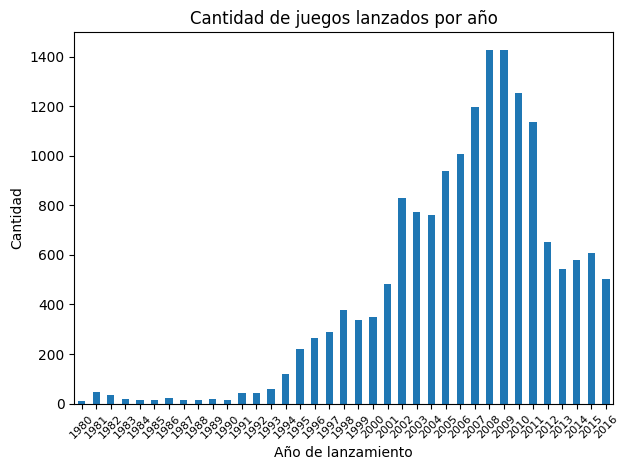

In [110]:
# Crear gráfico de barras
plt.figure(figsize=(12, 6))
games_year.plot.bar(x='year_of_release', y='quantity', legend=False)

plt.xlabel('Año de lanzamiento')
plt.ylabel('Cantidad')
plt.title('Cantidad de juegos lanzados por año')
plt.xticks(rotation=45, fontsize=8)

plt.tight_layout()
plt.show()

Observaciones:
- Desde 1980 hasta mediados de los años 90, la cantidad de lanzamientos por año es baja y estable.
- El mayor número de lanzamientos se alcanza entre 2008 y 2009, con más de 1400 juegos al año.
- A partir de 2010, se observa una disminución sostenida en la cantidad de lanzamientos por año.
- Los datos son representativos y evidencian un crecimiento sostenido en el lanzamiento de videojuegos a lo largo de los años. Este aumento refleja no solo una alta demanda por parte del público, sino también el constante crecimiento y evolución de la industria del videojuego, que año tras año presenta nuevas propuestas e innovaciones.

In [111]:
# Plataformas con las mayores ventas totales

In [112]:
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)
top_platforms

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

In [113]:
# Distribución basada en los datos de cada año.
df_top = df[df['platform'].isin(top_platforms.index)]

sales_by_year = df_top.pivot_table(
    index='year_of_release',
    columns='platform',
    values='total_sales',
    aggfunc='sum'
)

In [114]:
sales_by_year

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
1985,0.02,NaN,NaN,NaN,NaN
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41


<AxesSubplot:xlabel='year_of_release'>

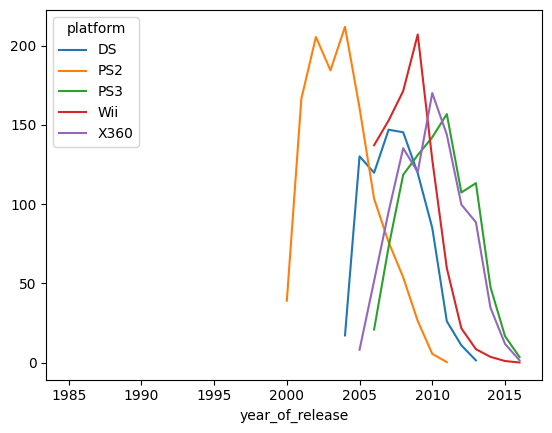

In [115]:
sales_by_year.plot()

Observaciones:
- La mayoría de las plataformas muestran un ciclo de vida de 8 a 10 años, desde su pico hasta su caída total en ventas.
- Algunas plataformas, como la Wii, tuvieron un crecimiento muy rápido y luego una caída también abrupta.
- Otras como PS2 tuvieron un crecimiento más sostenido antes de alcanzar su pico.
- Se observa cómo nuevas plataformas reemplazan a las anteriores: por ejemplo, las ventas de PS2 caen al tiempo que las de PS3 suben.
- Esto indica un patrón de relevo generacional en las consolas.
- Una vez que una plataforma empieza a decaer, suele desaparecer del mercado en pocos años (entre 2 y 4 años después del pico).
- Entre 2008 y 2010 hubo varias plataformas coexistiendo con altos niveles de ventas (DS, Wii, PS3, X360), lo que indica un mercado competitivo y diversificado.
- Las plataformas no entran todas al mismo tiempo, sino que van entrando y saliendo escalonadamente, lo cual permite a las empresas alternar sus ciclos de innovación.

In [116]:
# Crear un modelo para 2017

In [117]:
# Filtrar datos desde 2012 a 2016
df_recent = df[df['year_of_release'] >= 2012]

In [118]:
# Agrupar por plataforma y sumar ventas
top_platforms_recent = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5)

top_platforms_recent

platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
Name: total_sales, dtype: float64

In [119]:
df_top_recent = df_recent[df_recent['platform'].isin(top_platforms_recent.index)]

sales_by_year_recent = df_top_recent.pivot_table(index='year_of_release',
                                   columns='platform',
                                   values='total_sales',
                                   aggfunc='sum')

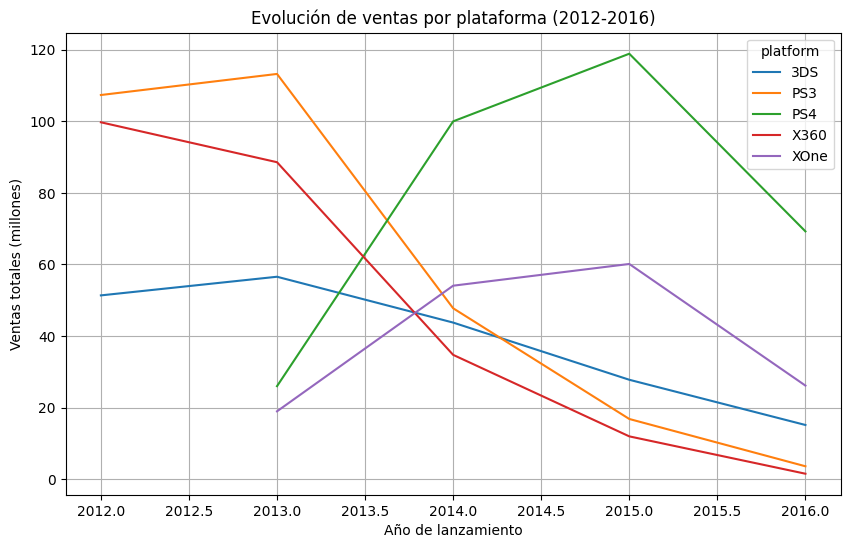

In [120]:
sales_by_year_recent.plot(figsize=(10, 6))
plt.title('Evolución de ventas por plataforma (2012-2016)')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.show()

Observaciones:
- PS4 alcanza el pico más alto de ventas en 2015, consolidándose como la plataforma más exitosa de este período.
- PS3 presenta un declive continuo desde 2013, lo que sugiere que fue reemplazada progresivamente por su sucesora, la PS4.
- Las plataformas de Xbox (X360 y XOne) tienen ventas menores en comparación con PlayStation, indicando una menor popularidad global en este período.
- La consola 3DS se mantiene relativamente estable, con un leve descenso hacia 2016, lo que indica una base de usuarios fiel aunque en declive.

Conclusión:
- Con base en la evolución de ventas entre 2012 y 2016, la PS4 se perfila como la plataforma más rentable para el año 2017, ya que muestra un crecimiento sostenido y alcanza su punto más alto en 2015, manteniéndose fuerte en 2016. Su ciclo de vida aún no muestra señales claras de declive, lo que la convierte en una apuesta segura para el futuro inmediato.

In [121]:
# Agrupar las plataformas de la misma marca

In [122]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [123]:
def group_platform(platform):
    playstation = ['PS', 'PS2', 'PS3', 'PS4', 'PS5', 'PSP', 'PSV']
    xbox = ['XB', 'X360', 'XOne', 'XSX']
    nintendo = ['NES', 'SNES', 'N64', 'GC', 'Wii', 'WiiU', 'GB', 'GBA', 'DS', '3DS', 'NS']
    pc = ['PC']
    
    if platform in playstation:
        return 'PlayStation'
    elif platform in xbox:
        return 'Xbox'
    elif platform in nintendo:
        return 'Nintendo'
    elif platform in pc:
        return 'PC'
    else:
        return 'Other'

df['brand'] = df['platform'].apply(group_platform)

In [124]:
df['brand'].value_counts()

PlayStation    6720
Nintendo       6270
Xbox           2333
PC              974
Other           416
Name: brand, dtype: int64

In [125]:
# Filtrar solo los años relevantes
df_filtered = df[df['year_of_release'] >= 2000]

sales_by_brand = df_filtered.pivot_table(
    index='year_of_release',
    columns='brand',
    values='total_sales',
    aggfunc='sum'
)

<Figure size 1000x600 with 0 Axes>

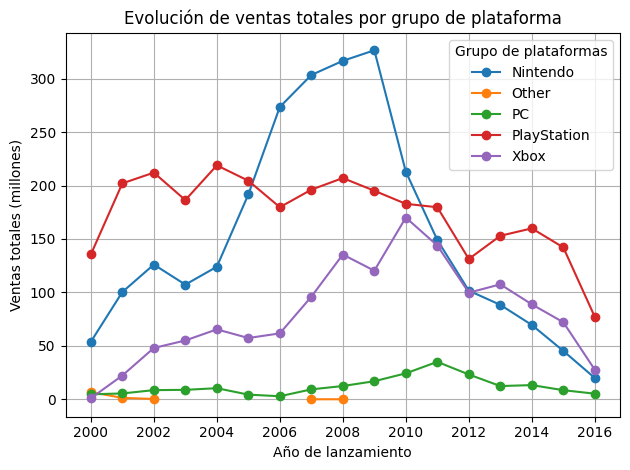

In [126]:
plt.figure(figsize=(10, 6))
sales_by_brand.plot(marker='o')  # puedes usar kind='line' o marker para destacar puntos

plt.title('Evolución de ventas totales por grupo de plataforma')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (millones)')
plt.grid(True)
plt.legend(title='Grupo de plataformas')
plt.tight_layout()
plt.show()

Observaciones:
* Para facilitar el análisis, he agrupado las plataformas según su marca (Nintendo, PlayStation, Xbox, PC y Other). Esto permite comparar de forma más clara el rendimiento general de cada grupo a lo largo del tiempo.

- Nintendo presenta el pico de ventas más alto en todo el período analizado, alcanzando su punto máximo entre 2008 y 2010. Sin embargo, tras ese auge, sus ventas cayeron abruptamente, llegando a niveles significativamente bajos en 2016.
- PlayStation, en cambio, muestra un desempeño más estable en el tiempo. Aunque no alcanza un pico tan alto como Nintendo, mantiene una tendencia sólida, con ventas anuales generalmente entre los 100 y 250 millones, lo que la convierte en una de las plataformas más consistentes.
- Xbox también tiene un crecimiento relevante entre 2004 y 2010, pero sus ventas no alcanzan los niveles de Nintendo ni PlayStation. Posteriormente muestra una ligera caída.
- PC mantiene un volumen de ventas bajo pero constante, lo que podría representar una base de usuarios leal aunque más reducida.
- Other agrupa varias plataformas menores que nunca lograron un volumen significativo de ventas. Su impacto en el mercado es bajo y con una tendencia plana.

In [127]:
# Crear diagrama de caja para las ventas globales

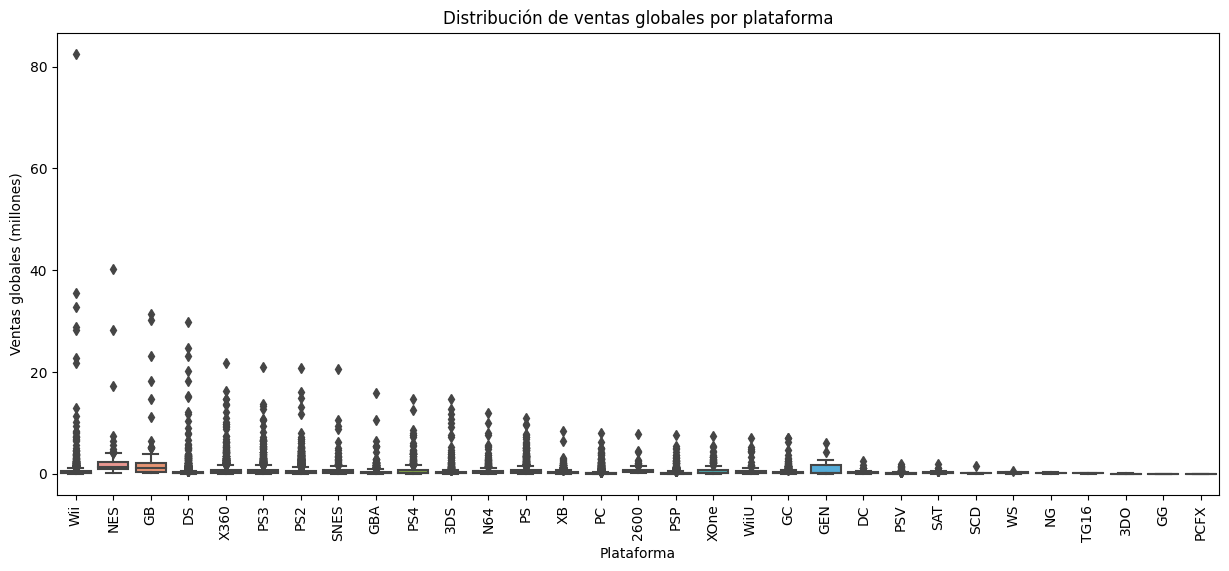

In [128]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma')
plt.xticks(rotation=90)
plt.ylabel('Ventas globales (millones)')
plt.xlabel('Plataforma')
plt.show()

Observaciones:
- Para la mayoría de las plataformas, la línea media (mediana) está muy cerca de cero. Esto sugiere que la mayoría de los juegos no venden grandes cantidades, y que las puntos altos son casos aislados.
- Wii, DS, NES y X360 tienen algunos juegos con más de 20, 40 o incluso 80 millones de unidades vendidas, lo que indica que fueron responsables de algunos de los juegos más vendidos de la historia.
- Plataformas como PCFX, GG, 3DO, TG16, NG, WS, etc., muestran ventas mínimas y muy poca actividad. Esto las posiciona como plataformas con bajo impacto comercial general.

In [129]:
# Crear gráfico de dispersión (Wii)

In [130]:
# Filtrar solo los juegos de Wii
wii_data = df[df['platform'] == 'Wii'].copy()

# Eliminar filas con valores faltantes en las columnas relevantes
wii_data = wii_data.dropna(subset=['user_score', 'critic_score', 'total_sales'])

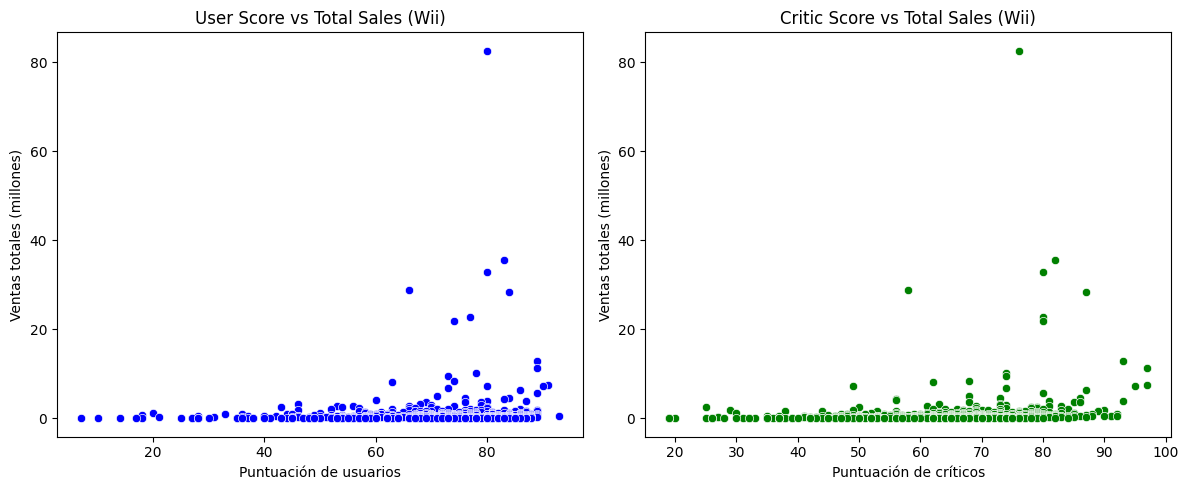

In [131]:
# Gráfico: user_score vs total_sales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=wii_data, x='user_score', y='total_sales', color='blue')
plt.title('User Score vs Total Sales (Wii)')
plt.xlabel('Puntuación de usuarios')
plt.ylabel('Ventas totales (millones)')

# Gráfico: critic_score vs total_sales
plt.subplot(1, 2, 2)
sns.scatterplot(data=wii_data, x='critic_score', y='total_sales', color='green')
plt.title('Critic Score vs Total Sales (Wii)')
plt.xlabel('Puntuación de críticos')
plt.ylabel('Ventas totales (millones)')

plt.tight_layout()
plt.show()

In [132]:
# Calcular la correlación
cor_user = wii_data['user_score'].corr(wii_data['total_sales'])
cor_critic = wii_data['critic_score'].corr(wii_data['total_sales'])

print(f"Correlación entre user_score y ventas: {cor_user:.2f}")
print(f"Correlación entre critic_score y ventas: {cor_critic:.2f}")

Correlación entre user_score y ventas: 0.11
Correlación entre critic_score y ventas: 0.17


Observaciones:
- Ambas están cerca de 0, lo que indica que la relación es débil o casi nula. No hay una fuerte conexión lineal entre las puntuaciones y las ventas.
- La correlación entre la puntuación de críticos y las ventas totales es más alta que la de los usuarios, lo que sugiere que las reseñas profesionales podrían influir ligeramente más en el éxito comercial de un juego.
- En ambos gráficos, hay juegos con puntuaciones moderadas pero ventas extremadamente altas. Esto podría deberse a:
Campañas de marketing,
popularidad de la franquicia,
juegos dirigidos a públicos más amplios.
- Los juegos con puntuaciones muy altas no siempre alcanzan las mayores ventas, lo que indica que una alta puntuación no garantiza éxito comercial.

In [133]:
# Distribución general de los juegos por género

In [134]:
sales_per_genre = df.groupby('genre')['total_sales'].sum().reset_index(name='total_sales_genre')
sales_per_genre = sales_per_genre.sort_values('total_sales_genre', ascending=False)
sales_per_genre

,genre,total_sales_genre
0,Action,1744.17
10,Sports,1331.27
8,Shooter,1052.45
7,Role-Playing,934.56
4,Platform,827.77
3,Misc,802.51
6,Racing,728.67
2,Fighting,447.53
9,Simulation,389.97
5,Puzzle,242.57


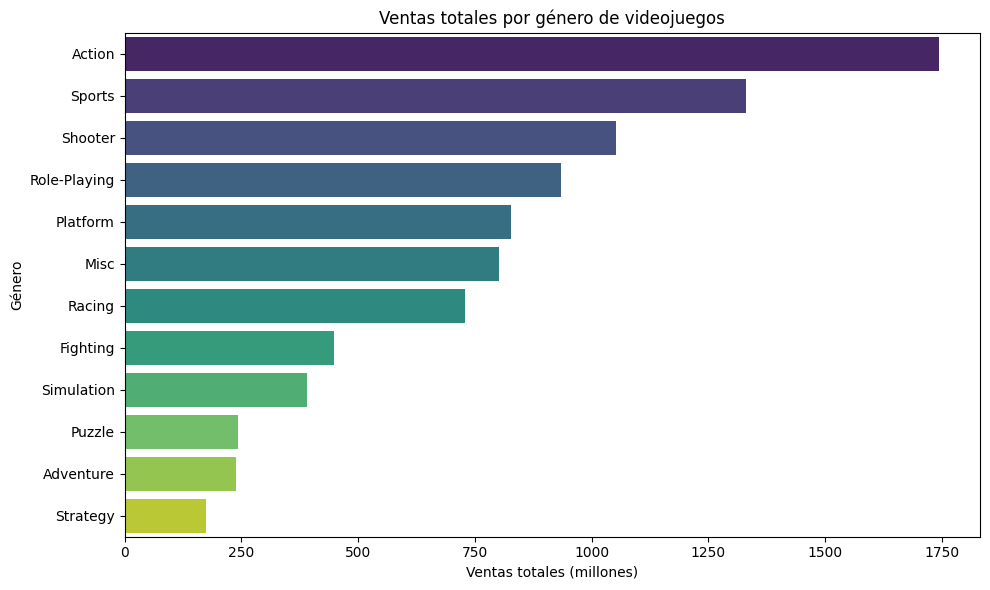

In [135]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_per_genre, x='total_sales_genre', y='genre', palette='viridis')
plt.title('Ventas totales por género de videojuegos')
plt.xlabel('Ventas totales (millones)')
plt.ylabel('Género')
plt.tight_layout()
plt.show()

Conclusión:
- Se puede generalizar que los géneros con ventas más altas tienden a estar orientados a la acción, la competencia y la adrenalina (como Action, Sports y Shooter), mientras que los géneros con ventas más bajas suelen enfocarse en un público más reducido, con un ritmo de juego más pausado o con menor presencia comercial (como Puzzle, Adventure y Strategy).

In [136]:
# Crear perfil de usuario para cada región

In [137]:
# Cinco plataformas principales

In [138]:
top_platform = df.groupby('platform')['total_sales'].sum().reset_index(name='total_sales_platform')
top_platform = top_platform.sort_values('total_sales_platform', ascending=False).head()

In [139]:
top_platform

,platform,total_sales_platform
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


In [140]:
sales_per_region = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()
sales_per_region.sample(3)

,platform,na_sales,eu_sales,jp_sales
8,GEN,19.27,5.52,2.67
28,X360,602.47,270.76,12.43
4,DS,382.40,188.89,175.57


In [141]:
# Convertir una columna de dataframe en una lista
top_5_platform = top_platform['platform'].tolist()

In [142]:
sales_top_5 = sales_per_region[sales_per_region['platform'].isin(top_5_platform)]

In [143]:
# Unir la info en un DataFrame
top_platform_sales = pd.merge(top_platform, sales_top_5, on='platform')
top_platform_sales

,platform,total_sales_platform,na_sales,eu_sales,jp_sales
0,PS2,1255.77,583.84,339.29,139.20
1,X360,971.42,602.47,270.76,12.43
2,PS3,939.65,393.49,330.29,80.19
3,Wii,907.51,496.90,262.21,69.33
4,DS,806.12,382.40,188.89,175.57


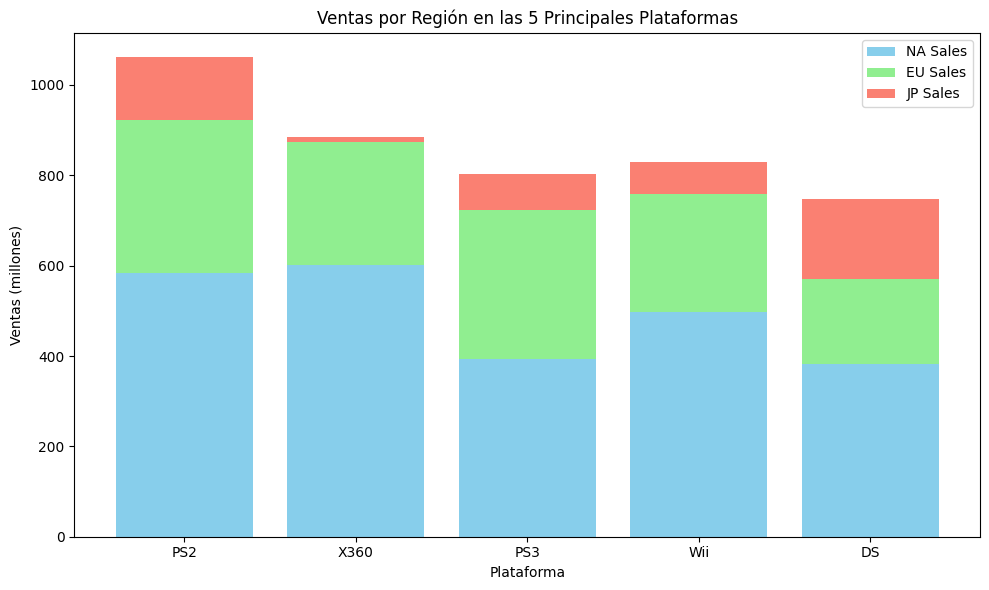

In [144]:
platforms = top_platform_sales['platform']
na = top_platform_sales['na_sales']
eu = top_platform_sales['eu_sales']
jp = top_platform_sales['jp_sales']

# Crear gráfico
plt.figure(figsize=(10, 6))

plt.bar(platforms, na, label='NA Sales', color='skyblue')
plt.bar(platforms, eu, bottom=na, label='EU Sales', color='lightgreen')
plt.bar(platforms, jp, bottom=na+eu, label='JP Sales', color='salmon')

plt.title('Ventas por Región en las 5 Principales Plataformas')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.tight_layout()
plt.show()

Observaciones:
- Las ventas en América del Norte (NA) son consistentemente las más altas para todas las plataformas analizadas, lo que sugiere que este mercado representa la mayor cuota de mercado en la industria de videojuegos.
- Las ventas en Europa (EU) también son significativas, ocupando el segundo lugar en todas las plataformas, aunque con una brecha notable respecto a NA.
- Japón (JP) presenta el volumen de ventas más bajo en comparación con NA y EU. Esto puede deberse a factores como:
La diferencia de tamaño de mercado (es solo un país).
Posibles preferencias de plataformas locales distintas (por ejemplo, plataformas portátiles o japonesas no incluidas en el top 5 global).
- El orden regional se mantiene constante en las cinco plataformas principales: NA > EU > JP, lo que indica una tendencia estable en términos de participación por región.
- La DS es la única plataforma donde Japón tiene una presencia destacada, probablemente por tratarse de una consola portátil de Nintendo, empresa japonesa con fuerte influencia local.

In [145]:
# Cinco géneros principales

In [146]:
top_5_genre = sales_per_genre.head().reset_index(drop=True)
top_5_genre = top_5_genre['genre'].tolist()
top_5_genre

['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

In [147]:
sales_genre_per_region = df.groupby('genre')[['na_sales','eu_sales','jp_sales']].sum().reset_index()
sales_genre_per_region.sample(3)

,genre,na_sales,eu_sales,jp_sales
6,Racing,359.35,236.51,56.71
1,Adventure,105.26,63.54,52.30
7,Role-Playing,330.81,188.71,355.41


In [148]:
top_5_genre_region = sales_genre_per_region[sales_genre_per_region['genre'].isin(top_5_genre)].reset_index(drop=True)
top_5_genre_region

,genre,na_sales,eu_sales,jp_sales
0,Action,879.01,519.13,161.43
1,Platform,445.50,200.35,130.83
2,Role-Playing,330.81,188.71,355.41
3,Shooter,592.24,317.34,38.76
4,Sports,684.43,376.79,135.54


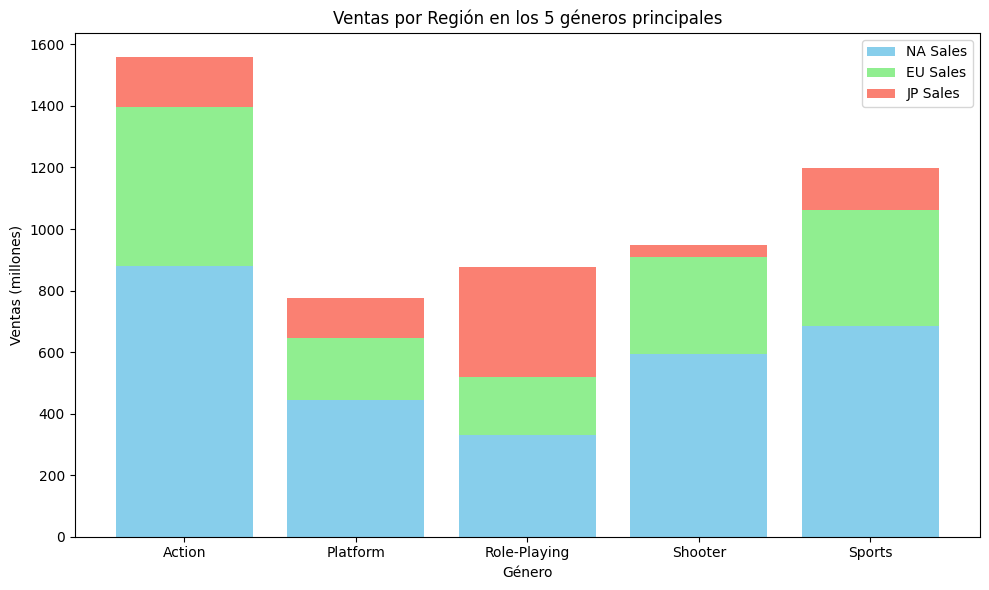

In [149]:
genres = top_5_genre_region['genre']
na = top_5_genre_region['na_sales']
eu = top_5_genre_region['eu_sales']
jp = top_5_genre_region['jp_sales']

plt.figure(figsize=(10,6))

plt.bar(genres, na, label='NA Sales', color='skyblue')
plt.bar(genres, eu, bottom=na, label='EU Sales', color='lightgreen')
plt.bar(genres, jp, bottom=na+eu, label='JP Sales', color='salmon')

plt.title('Ventas por Región en los 5 géneros principales')
plt.xlabel('Género')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.tight_layout()
plt.show()

Observaciones:
- El género Action lidera ampliamente en ventas totales, impulsado principalmente por las ventas en Norteamérica, que superan ampliamente al resto de las regiones.
- El género Role-Playing es el único del top 5 donde Japón tiene un papel protagonista, con ventas considerablemente altas, superando incluso a las ventas de Europa para este género.
- Norteamérica (NA) es el mercado con mayor volumen de ventas en todos los géneros excepto Role-Playing.
- Europa (EU) ocupa consistentemente el segundo lugar en la mayoría de los géneros.
- Japón (JP) tiene menor participación general, pero en Role-Playing su impacto es significativo.

In [150]:
# Clasificaciones ESRB

In [151]:
# Agrupamos por rating y sumamos las ventas por región
rating_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum().reset_index()

# Ordenamos por ventas en NA por ejemplo
rating_sales = rating_sales.sort_values('na_sales', ascending=False)
rating_sales

,rating,na_sales,eu_sales,jp_sales
1,E,1292.99,710.25,198.11
7,T,759.75,427.03,151.40
5,M,748.48,483.97,64.24
2,E10+,353.32,188.52,40.20
4,K-A,2.56,0.27,1.46
3,EC,1.53,0.11,0.00
0,AO,1.26,0.61,0.00
6,RP,0.00,0.08,0.00


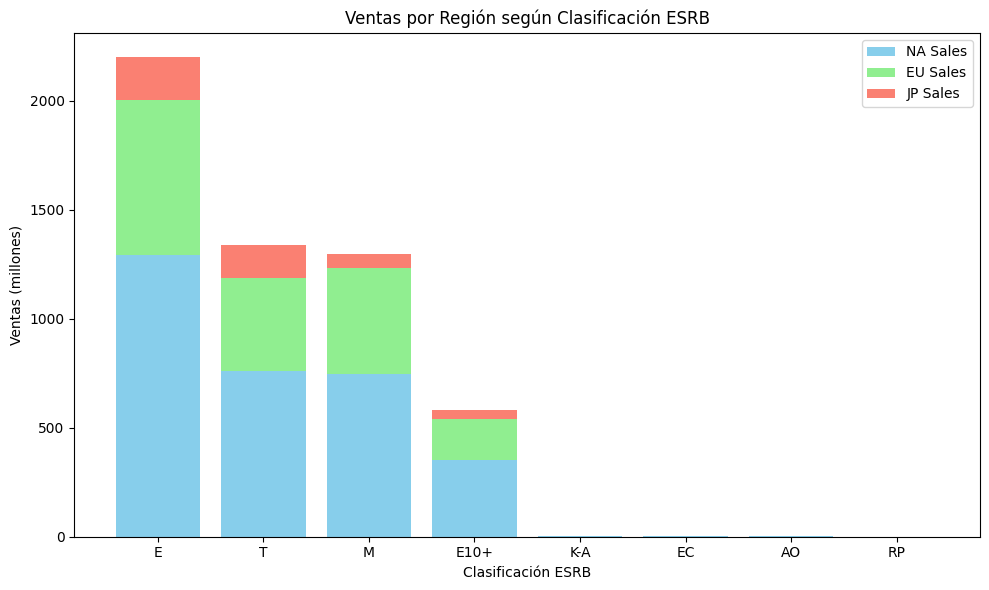

In [152]:
ratings = rating_sales['rating']
na = rating_sales['na_sales']
eu = rating_sales['eu_sales']
jp = rating_sales['jp_sales']

plt.figure(figsize=(10,6))
plt.bar(ratings, na, label='NA Sales', color='skyblue')
plt.bar(ratings, eu, bottom=na, label='EU Sales', color='lightgreen')
plt.bar(ratings, jp, bottom=na+eu, label='JP Sales', color='salmon')

plt.title('Ventas por Región según Clasificación ESRB')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.legend()
plt.tight_layout()
plt.show()

Observaciones:
- La clasificación “E” (Everyone) es la que acumula mayores ventas totales en todas las regiones, especialmente en Norteamérica, donde supera ampliamente al resto de las clasificaciones.
- Las clasificaciones “T” (Teen) y “M” (Mature) también tienen ventas destacadas, pero muy por debajo de “E”.
- La clasificación “E10+” (para mayores de 10 años) tiene ventas notables, pero mucho más bajas que “E”, lo cual sugiere que los juegos familiares o aptos para todo público son más exitosos que los dirigidos a públicos ligeramente mayores.
- Clasificaciones como “K-A”, “EC”, “AO” y “RP” tienen un impacto prácticamente nulo en las ventas, lo que indica que son muy poco comunes o comercialmente irrelevantes en el mercado global.
- El patrón general se mantiene: Norteamérica lidera en ventas para todas las clasificaciones, seguida de Europa, y por último Japón.

# 4. Prueba de hipótesis

1. Planteamiento de hipótesis:
- Hipótesis nula (H₀): Las calificaciones promedio de los usuarios son iguales para Xbox One y PC.
- Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios no son iguales.

In [153]:
# Filtramos los datos por plataforma y eliminamos valores nulos
xone_scores = df[(df['platform'] == 'XOne') & (df['user_score'].notna())]['user_score']
pc_scores = df[(df['platform'] == 'PC') & (df['user_score'].notna())]['user_score']

# Realizamos la prueba t de Student para muestras independientes
alpha = 0.05
t_stat, p_value = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print(f'Estadístico t: {t_stat:.3f}')
print(f'Valor p: {p_value:.3f}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencias significativas en las calificaciones promedio.")

Estadístico t: -4.653
Valor p: 0.000
Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.


2. Planteamiento de hipótesis
- Hipótesis nula (H₀): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.
- Hipótesis alternativa (H₁): Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

In [154]:
# Filtrar datos por género
action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

# Prueba t
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=False)

print("Estadístico t:", t_stat)
print("Valor p:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula: no hay diferencias significativas.")

Estadístico t: 1.5774679163334975
Valor p: 0.1148381879149927
No se puede rechazar la hipótesis nula: no hay diferencias significativas.


Conclusión:
- Se realizaron dos pruebas de hipótesis para analizar si existen diferencias significativas en las calificaciones promedio de los usuarios según plataforma y género:

Plataformas (Xbox One vs. PC):
La prueba t arrojó un valor p menor a 0.05, por lo que rechazamos la hipótesis nula. Esto indica que las calificaciones promedio de los usuarios son significativamente diferentes entre Xbox One y PC.

Géneros (Acción vs. Deportes):
De igual manera, el valor p fue menor que el umbral de significancia (alfa = 0.05), por lo que también rechazamos la hipótesis nula. Esto significa que existe una diferencia significativa en las calificaciones promedio de los usuarios entre los géneros de Acción y Deportes.

Establecimos un umbral de significancia alfa = 0.05 (5%), que es comúnmente utilizado en análisis estadístico. Si el valor p resultante era menor que 0.05, rechazábamos la hipótesis nula.

En ambos casos, los resultados sugieren que las preferencias de los usuarios varían de forma notable según la plataforma y el tipo de juego.

# 5. Conclusión

El análisis permitió identificar los géneros y plataformas más rentables, revelar patrones de consumo según la región, y comprobar mediante pruebas estadísticas que existen diferencias reales en las calificaciones de usuarios según plataforma y género.

Además, se evidenció que las preferencias de los usuarios varían significativamente entre regiones, lo que sugiere que ciertos géneros o consolas tienen mejor acogida en mercados específicos. Por ejemplo, un juego exitoso en Norteamérica no necesariamente tendrá el mismo desempeño en Japón, ya que las diferencias culturales y hábitos de consumo influyen directamente en la popularidad de un género o consola.

Estos hallazgos pueden ser valiosos para tomar decisiones estratégicas más segmentadas, como enfocar lanzamientos de determinados títulos en regiones donde su género tiene mayor demanda, o adaptar campañas de marketing según las preferencias locales. En conjunto, este análisis ofrece una base sólida para optimizar decisiones en la industria del gaming a nivel global.